# stochastic multi arm bandits

In this jupyther python notebook, we want to design and conduct an experiment for nonstationary stochastic multi arm bandits.
We start with the  10-armed testbed in which all the q(a) start out equal and then take independent random walks (by adding
a normally distributed increment with mean zero and standard deviation 0.01 on each
step).

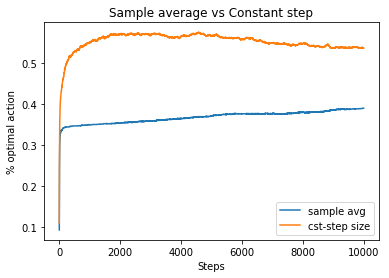

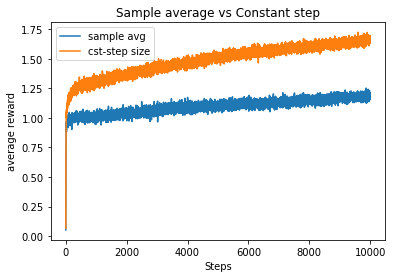

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from StochasticMultiArmBandits import Bandit

def banditSimulation(nBandits, time, bandits):
    bestActionCounts = [np.zeros(time, dtype='float') for _ in range(0, len(bandits))]
    averageRewards = [np.zeros(time, dtype='float') for _ in range(0, len(bandits))]
    for banditInd, bandit in enumerate(bandits):
        for i in range(0, nBandits):
            for t in range(0, time):
                action = bandit[i].getAction()
                reward = bandit[i].takeAction(action)
                averageRewards[banditInd][t] += reward
                if action == bandit[i].bestAction:
                    bestActionCounts[banditInd][t] += 1
        bestActionCounts[banditInd] /= nBandits
        averageRewards[banditInd] /= nBandits
    return bestActionCounts, averageRewards


# plot results
def plot_results(nBandits, time):
    bandits =[]
    bandits.append([Bandit(sampleAverages=True) for _ in range(0, nBandits) ])
    bandits.append([Bandit() for _ in range(0, nBandits) ])
    bestActionCounts, averageRewards = banditSimulation(nBandits, time, bandits)
    global figureIndex
    plt.figure(figureIndex)
    figureIndex += 1
    labels = ['sample avg', 'cst-step size']
    for label, counts in zip(labels, bestActionCounts):
        plt.plot(counts, label=label)
    plt.xlabel('Steps')
    plt.ylabel('% optimal action')
    plt.legend()
    plt.title('Sample average vs Constant step')
    plt.figure(figureIndex)

    figureIndex += 1
    for label, rewards in zip(labels, averageRewards):
        plt.plot(rewards, label=label)
    plt.xlabel('Steps')
    plt.ylabel('average reward')
    plt.legend()
    plt.title('Sample average vs Constant step')
    
figureIndex = 0
plot_results(2000, 10000)
plt.show()